In [25]:
image_path = ''
image_name = 'Dresden_01'
input_prefix = '/task-10-annotation-9-by-1-tag-'
file_path_pre = image_path + image_name + input_prefix

# files as RGB
list_building = ["buildings-0.npy", "buildings-1.npy"]
list_green = ["green-0.npy", "green-1.npy", "green-2.npy", "green-3.npy"]
list_water = ["water-0.npy"]

#----------------------IMPORTS---------------------------#

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from PIL import Image

In [134]:
#---------------------EXECUTION--------------------------#

i_height, i_width = np.load(file_path_pre + list_water[0]).shape
mask = np.zeros((i_height, i_width, 4), dtype="float32")

building = np.array([np.load(file_path_pre + file) for file in list_building], dtype="float32")
green = np.array([np.load(file_path_pre + file) for file in list_green], dtype="float32")
water = np.array([np.load(file_path_pre + file) for file in list_water], dtype="float32")

print(f"buildings: {building.shape}, max:{building.max()}, sum:{building.sum()}")
print(f"green: {green.shape}, max:{green.max()}, sum:{green.sum()}")
print(f"water: {water.shape}, max:{water.max()}, sum:{water.sum()}")
print(f"pixels in total {i_height * i_width}\n")

buildings: (2, 2427, 4800), max:255.0, sum:591160960.0
green: (4, 2427, 4800), max:255.0, sum:888769664.0
water: (1, 2427, 4800), max:255.0, sum:381060640.0
pixels in total 11649600
pixels in found 1860991232.0



In [120]:
for i in tqdm(range(i_height)):
    for j in range(i_width):
        if np.array([building[b][i][j] for b in range(len(list_building))]).sum() > 0:
            mask[i][j][0] = 1.
        elif np.array([green[g][i][j] for g in range(len(list_green))]).sum() > 0:
                mask[i][j][1] = 1.
        elif np.array([water[w][i][j] for w in range(len(list_water))]).sum() > 0:
                mask[i][j][2] = 1.
        else: mask[i][j][3] = 1.


100%|██████████| 2427/2427 [02:22<00:00, 16.99it/s]


In [106]:
building[0][1123][2267]>0
np.array([building[b][1123][2267] for b in range(len(list_building))]).sum() >0

True

2139 2216
0.0 0.0 255.0
[0. 0. 1.]
174 1152
0.0 0.0 0.0
[0. 1. 0.]
1345 1304
0.0 0.0 255.0
[0. 0. 1.]
428 819
0.0 0.0 255.0
[0. 0. 1.]
11649600.0


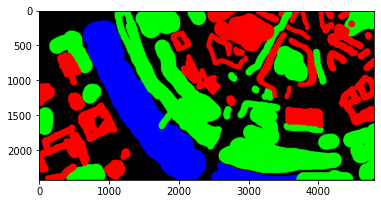

In [126]:
for l in range(4):
    i, j = np.random.randint(0, i_height, 2)

    print(i, j)
    print(building[0][i][j], green[0][i][j], water[0][i][j])
    print(mask[i,j,:3])

print(mask.sum())
plt.imshow(mask[:, :, :3])

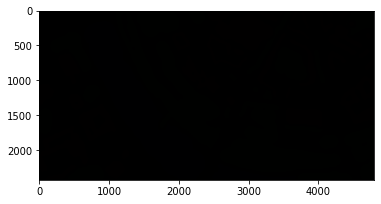

Mask imported: (2427, 4800, 4).
class distribution: [2337555.0, 3394561.0, 1476757.0, 4440727.0]
class distribution: [0.20065538730943552, 0.2913886313693174, 0.12676460994368904, 0.38119137137755804]


In [131]:
mask_image = mask[:, :, :3].copy()
mask_view = Image.fromarray(mask_image.astype("uint8"))
plt.imshow(mask_view)
plt.show()
print(f"Mask imported: {mask.shape}.\n"
      f"class distribution: {[np.sum(mask[: , :, i])for i in range(4)]}\n"
      f"class distribution: {[np.sum(mask[: , :, i]) / mask[:, :, 0].size for i in range(4)]}")

In [133]:
np.save(image_path + image_name + "/mask.npy", mask)